# Analyse des données

# Processus de fabrication en flux continu à plusieurs étapes
## Introduction

Les données que nous allons analysées proviennent d'une ligne de production continue située à Detroit. Cette ligne utilise plusieurs machines en parallèle et en série pour fabriquer des produits, et des mesures sont effectuées à divers points du processus.

Dans la première étape, les machines 1, 2 et 3 sont configurées en parallèle alimentant leur sortie dans un flux combiné. Ce flux combiné a 15 emplacements différents pour prendre des mesures. Il alimente ensuite sa sortie dans une deuxième étape qui comporte 2 machines ; 4 et 5 en série et les mêmes mesures sont prises à nouveau dans 15 emplacements différents.
La configuration est illustrée dans le schéma ci-dessous.

```
Machine 1       Machine 2        Machine 3
|                  |                 |
|                  |                 |
|                  |                 |
|                  |                 |
|__________________|_________________|
                   |
                   |
                   |
                Machine 4
                   |
                   |
                   |
                Machine 5

```



Les données ont été récupérées depuis [ici](https://www.kaggle.com/datasets/supergus/multistage-continuousflow-manufacturing-process). Le propriétaire du dataset sur Kaggle a fourni la description des variables du dataset ci-dessous :

```
~.C.Setpoint		Setpoint pour la variable contrôlée
~.C.Actual		Valeur réelle de la variable contrôlée
~.U.Actual		Valeur réelle de la variable non contrôlée
Autres		Variables environnementales ou de matières premières, états/événements, etc.
Début col	Fin col	Description
0	0	Horodatage
1	2	Conditions ambiantes de l'usine
3	6	Première étape, Machine 1, propriétés des matières premières (matière entrant dans la Machine 1)
7	14	Première étape, variables de processus de la Machine 1
15	18	Première étape, Machine 2, propriétés des matières premières (matière entrant dans la Machine 2)
19	26	Première étape, variables de processus de la Machine 2
27	30	Première étape, Machine 3, propriétés des matières premières (matière entrant dans la Machine 3)
31	38	Première étape, variables de processus de la Machine 3
39	41	Paramètres du processus du combinateur. Ici, nous combinons les sorties des Machines 1, 2 et 3.
42	71	SORTIE PRINCIPALE À CONTRÔLER : Mesures de 15 caractéristiques (en mm), avec consigne ou cible pour chacune
72	78	Deuxième étape, variables de processus de la Machine 4
79	85	Deuxième étape, variables de processus de la Machine 5
86	115	SORTIE SECONDAIRE À CONTRÔLER : Mesures de 15 caractéristiques (en mm), avec consigne ou cible pour chacune
```

**Charger les bibliothèques nécessaires**

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px
from plotly import graph_objects as go
import warnings

# Configuration initiale
warnings.filterwarnings("ignore")
sns.set()
# %matplotlib inline


# Chargement des données

Les données ont été lues dans un DataFrame pandas et les 5 premières lignes ont été affichées.

In [ ]:
# Charger les données
df = pd.read_csv("continuous_factory_process.csv")

# Afficher les premières lignes
df.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


Afficher des informations générales sur le DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14088 entries, 0 to 14087
Columns: 116 entries, time_stamp to Stage2.Output.Measurement14.U.Setpoint
dtypes: float64(108), int64(7), object(1)
memory usage: 12.5+ MB


La plupart des variables de ce dataset sont numériques, sauf la variable `time_stamp` qui est de type caractère.

In [ ]:
df.columns

Index(['time_stamp', 'AmbientConditions.AmbientHumidity.U.Actual',
       'AmbientConditions.AmbientTemperature.U.Actual',
       'Machine1.RawMaterial.Property1', 'Machine1.RawMaterial.Property2',
       'Machine1.RawMaterial.Property3', 'Machine1.RawMaterial.Property4',
       'Machine1.RawMaterialFeederParameter.U.Actual',
       'Machine1.Zone1Temperature.C.Actual',
       'Machine1.Zone2Temperature.C.Actual',
       ...
       'Stage2.Output.Measurement10.U.Actual',
       'Stage2.Output.Measurement10.U.Setpoint',
       'Stage2.Output.Measurement11.U.Actual',
       'Stage2.Output.Measurement11.U.Setpoint',
       'Stage2.Output.Measurement12.U.Actual',
       'Stage2.Output.Measurement12.U.Setpoint',
       'Stage2.Output.Measurement13.U.Actual',
       'Stage2.Output.Measurement13.U.Setpoint',
       'Stage2.Output.Measurement14.U.Actual',
       'Stage2.Output.Measurement14.U.Setpoint'],
      dtype='object', length=116)



```
# Ce texte est au format code
```

Le DataFrame contient 116 variables et environ 14000 observations.

In [ ]:
df.shape

(14088, 116)

Vérifier les valeurs nulles et les doublons dans le dataset.

In [ ]:
# Trouver les valeurs nulles dans le dataset
df.isna().sum()


time_stamp                                       0
AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 116, dtype: int64

In [ ]:
# Trouver les doublons dans le dataset
df.duplicated().sum()

0

Le DataFrame est complet sans valeurs nulles et sans enregistrements dupliqués.

In [ ]:
df.dtypes

time_stamp                                        object
AmbientConditions.AmbientHumidity.U.Actual       float64
AmbientConditions.AmbientTemperature.U.Actual    float64
Machine1.RawMaterial.Property1                   float64
Machine1.RawMaterial.Property2                     int64
                                                  ...   
Stage2.Output.Measurement12.U.Setpoint           float64
Stage2.Output.Measurement13.U.Actual             float64
Stage2.Output.Measurement13.U.Setpoint           float64
Stage2.Output.Measurement14.U.Actual             float64
Stage2.Output.Measurement14.U.Setpoint           float64
Length: 116, dtype: object

L'intervalle de temps pendant lequel ces données ont été collectées doit être calculé, donc la variable `time_stamp` sera convertie du type `object` au type `datetime`.

In [ ]:
# Convertir la colonne timestamp en datetime
df["time_stamp"] = df["time_stamp"].astype("datetime64[ns]")

# Confirmer l'opération
df.dtypes

time_stamp                                       datetime64[ns]
AmbientConditions.AmbientHumidity.U.Actual              float64
AmbientConditions.AmbientTemperature.U.Actual           float64
Machine1.RawMaterial.Property1                          float64
Machine1.RawMaterial.Property2                            int64
                                                      ...      
Stage2.Output.Measurement12.U.Setpoint                  float64
Stage2.Output.Measurement13.U.Actual                    float64
Stage2.Output.Measurement13.U.Setpoint                  float64
Stage2.Output.Measurement14.U.Actual                    float64
Stage2.Output.Measurement14.U.Setpoint                  float64
Length: 116, dtype: object

La variable timestamp a été convertie avec succès en type de données `datetime`.

In [ ]:
# Obtenir la date maximale
max(df["time_stamp"])

Timestamp('2019-03-06 14:47:20')

In [ ]:
# Obtenir la date minimale
min(df["time_stamp"])

Timestamp('2019-03-06 10:52:33')

Calculer l'intervalle de temps.

In [ ]:
# Calculer l'intervalle de temps
max(df["time_stamp"])-min(df["time_stamp"])

Timedelta('0 days 03:54:47')

Les données ont été collectées le même jour, `2019-03-06` et l'ensemble de la collecte des données a pris 3 heures et 55 minutes, soit environ 4 heures.

Ces données doivent être divisées en différents groupes pour une meilleure gestion, donc le timestamp sera défini comme index car c'est la variable commune à tous les points où les données ont été collectées.

In [ ]:
df1 = df.copy()
df1.set_index("time_stamp", inplace=True)

## Organiser les données des machines

In [ ]:
def organiser_donnees_machine(NumeroMachine:int):
    """
    - Cette fonction divise les données selon l'identité de la machine (numéro)
    - L'argument est l'identité de la machine par exemple;
                                                1 pour la machine 1
                                                2 pour la machine 2
                                                3 pour la machine 3
                                                ...
    - Les variables sont renommées pour enlever Machine[numéro] et rendre les noms moins verbeux
    - Les nouvelles données de la machine récupérées sont finalement retournées.
    """
    # Rassembler les données spécifiquement pour une machine particulière
    colonnes_donnees_machine = [col for col in df1.columns if f"Machine{NumeroMachine}" in col]
    donnees_machine = df1[colonnes_donnees_machine]

    # Renommer les colonnes pour les rendre propres et moins verbeuses
    colonnes_renommees_donnees_machine = [col.split(f"Machine{NumeroMachine}.")[1] for col in colonnes_donnees_machine]

    donnees_machine.rename(dict(zip(colonnes_donnees_machine, colonnes_renommees_donnees_machine)),
                        inplace=True,
                       axis=1)

    # Réinitialiser l'index
    donnees_machine.reset_index(drop=False, inplace=True)

    return donnees_machine

# Obtenir les données de la machine 1
machine_1_df = organiser_donnees_machine(NumeroMachine=1)
machine_1_df.head()

,time_stamp,RawMaterial.Property1,RawMaterial.Property2,RawMaterial.Property3,RawMaterial.Property4,RawMaterialFeederParameter.U.Actual,Zone1Temperature.C.Actual,Zone2Temperature.C.Actual,MotorAmperage.U.Actual,MotorRPM.C.Actual,MaterialPressure.U.Actual,MaterialTemperature.U.Actual,ExitZoneTemperature.C.Actual
0,2019-03-06 10:52:33,11.54,200,963.0,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1
1,2019-03-06 10:52:34,11.54,200,963.0,247,1246.09,72.0,72.3,48.03,10.48,436.77,76.3,75.1
2,2019-03-06 10:52:35,11.54,200,963.0,247,1246.29,72.0,72.3,48.16,10.48,425.46,76.3,75.1
3,2019-03-06 10:52:36,11.54,200,963.0,247,1247.59,72.0,72.3,48.57,10.48,437.01,76.3,75.1
4,2019-03-06 10:52:37,11.54,200,963.0,247,1252.83,72.1,72.4,48.57,10.48,425.18,76.4,75.1


In [ ]:
# Obtenir les données de la machine 2
machine_2_df = organiser_donnees_machine(NumeroMachine=2)
machine_2_df.head()

,time_stamp,RawMaterial.Property1,RawMaterial.Property2,RawMaterial.Property3,RawMaterial.Property4,RawMaterialFeederParameter.U.Actual,Zone1Temperature.C.Actual,Zone2Temperature.C.Actual,MotorAmperage.U.Actual,MotorRPM.C.Actual,MaterialPressure.U.Actual,MaterialTemperature.U.Actual,ExitZoneTemperature.C.Actual
0,2019-03-06 10:52:33,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1
1,2019-03-06 10:52:34,12.59,236,601.11,257,220.16,69.35,69.05,73.19,13.89,246.02,69.0,60.0
2,2019-03-06 10:52:35,12.59,236,601.11,257,216.84,69.37,69.07,73.19,13.85,247.18,68.9,60.0
3,2019-03-06 10:52:36,12.59,236,601.11,257,208.61,69.38,69.08,72.81,13.90,249.92,69.1,59.9
4,2019-03-06 10:52:37,12.59,236,601.11,257,212.31,69.40,69.07,73.00,13.89,250.58,68.9,59.9


In [ ]:
# Obtenir les données de la machine 3
machine_3_df = organiser_donnees_machine(NumeroMachine=3)
machine_3_df.head()

,time_stamp,RawMaterial.Property1,RawMaterial.Property2,RawMaterial.Property3,RawMaterial.Property4,RawMaterialFeederParameter.U.Actual,Zone1Temperature.C.Actual,Zone2Temperature.C.Actual,MotorAmperage.U.Actual,MotorRPM.C.Actual,MaterialPressure.U.Actual,MaterialTemperature.U.Actual,ExitZoneTemperature.C.Actual
0,2019-03-06 10:52:33,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0
1,2019-03-06 10:52:34,9.02,186,421.16,200,213.36,78.1,78.4,341.85,13.59,262.88,65.3,65.0
2,2019-03-06 10:52:35,9.02,186,421.16,200,225.25,78.1,78.5,338.71,14.00,262.63,65.3,65.0
3,2019-03-06 10:52:36,9.02,186,421.16,200,213.99,78.1,78.5,339.15,13.67,262.22,65.4,65.0
4,2019-03-06 10:52:37,9.02,186,421.16,200,200.86,78.0,78.5,337.05,13.72,262.17,65.4,65.0


In [ ]:
# Obtenir les données de la machine 4
machine_4_df = organiser_donnees_machine(NumeroMachine=4)
machine_4_df.head()

,time_stamp,Temperature1.C.Actual,Temperature2.C.Actual,Pressure.C.Actual,Temperature3.C.Actual,Temperature4.C.Actual,Temperature5.C.Actual,ExitTemperature.U.Actual
0,2019-03-06 10:52:33,298.0,284.0,21.0,268.0,21.0,260.0,35.0
1,2019-03-06 10:52:34,301.0,287.0,23.0,270.0,23.0,263.0,35.0
2,2019-03-06 10:52:35,304.0,289.0,22.0,275.0,22.0,266.0,35.0
3,2019-03-06 10:52:36,307.0,291.0,23.0,277.0,23.0,269.0,35.0
4,2019-03-06 10:52:37,310.0,294.0,24.0,278.0,24.0,272.0,35.0


In [ ]:
# Obtenir les données de la machine 5
machine_5_df = organiser_donnees_machine(NumeroMachine=5)
machine_5_df.head()

,time_stamp,Temperature1.C.Actual,Temperature2.C.Actual,Temperature3.C.Actual,Temperature4.C.Actual,Temperature5.C.Actual,Temperature6.C.Actual,ExitTemperature.U.Actual
0,2019-03-06 10:52:33,309.8,289.9,263.9,238.6,245.0,66.1,50.0
1,2019-03-06 10:52:34,309.8,289.9,263.9,238.6,245.0,66.1,49.8
2,2019-03-06 10:52:35,309.8,289.9,263.9,238.6,245.0,66.1,49.1
3,2019-03-06 10:52:36,309.8,289.9,263.9,238.6,245.0,66.1,49.6
4,2019-03-06 10:52:37,309.8,289.9,263.9,238.6,245.0,66.1,49.5


**Récupérer les données des étapes**
Les données à différentes étapes sont également récupérées dans des DataFrames séparés.

In [ ]:
# Obtenir les variables de l'étape 1
colonnes_etape1 = [col for col in df1.columns if "Stage1" in col] + \
[col for col in df1.columns if "FirstStage" in col]

# Obtenir les données de l'étape 1
donnees_etape1 = df1[colonnes_etape1]
donnees_etape1.reset_index(drop=False, inplace=True)

donnees_etape1.head()

,time_stamp,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,...,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual
0,2019-03-06 10:52:33,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,...,6.16,1.66,2.02,2.69,3.16,14.51,17.72,99.1,108.2,80.0
1,2019-03-06 10:52:34,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,...,6.16,1.04,2.02,2.70,3.16,0.00,17.72,99.1,109.2,80.0
2,2019-03-06 10:52:35,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,...,6.16,1.04,2.02,2.70,3.16,0.00,17.72,99.6,111.0,80.0
3,2019-03-06 10:52:36,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,...,6.16,1.04,2.02,2.70,3.16,0.00,17.72,99.6,109.2,80.0
4,2019-03-06 10:52:37,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,...,6.16,1.15,2.02,2.72,3.16,0.00,17.72,99.6,109.8,80.0


In [ ]:
# Obtenir les variables de l'étape 2
colonnes_etape2 = [col for col in df1.columns if "Stage2" in col]

# Obtenir les données de l'étape 2
donnees_etape2 = df1[colonnes_etape2]
donnees_etape2.reset_index(drop=False, inplace=True)

donnees_etape2.head()

,time_stamp,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement0.U.Setpoint,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement1.U.Setpoint,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement2.U.Setpoint,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement3.U.Setpoint,Stage2.Output.Measurement4.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,0.0,12.05,0.0,11.71,0.0,11,0.0,20.73,0.0,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,0.0,12.05,0.0,11.71,0.0,11,0.0,20.73,0.0,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,0.0,12.05,0.0,11.71,0.0,11,0.0,20.73,0.0,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,0.0,12.05,0.0,11.71,0.0,11,0.0,20.73,0.0,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,0.0,12.05,0.0,11.71,0.0,11,0.0,20.73,0.0,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


# Analyse exploratoire des données (EDA)

Text(0.5, 1.0, 'Conditions ambiantes')

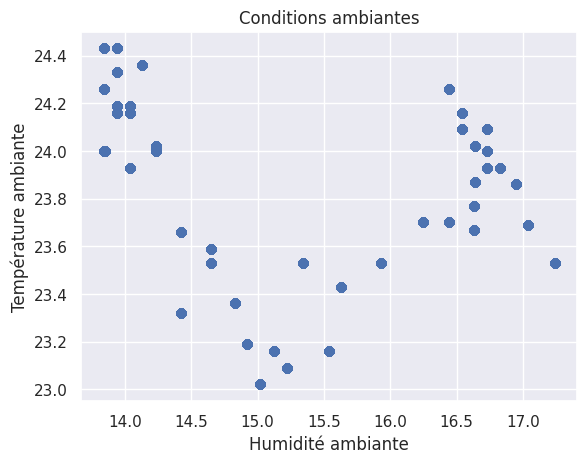

In [ ]:
plt.scatter(x=df1["AmbientConditions.AmbientHumidity.U.Actual"],
           y=df1["AmbientConditions.AmbientTemperature.U.Actual"])
plt.xlabel("Humidité ambiante")
plt.ylabel("Température ambiante")
plt.title("Conditions ambiantes")

Il n'y a pas de relation significative entre la température ambiante et l'humidité, sauf qu'une humidité moyenne/modérée a entraîné des températures basses, tandis que des humidités très basses et élevées ont augmenté les températures environnantes.

Text(0.5, 1.0, "Température réelle de l'opération du combinateur à la première étape")

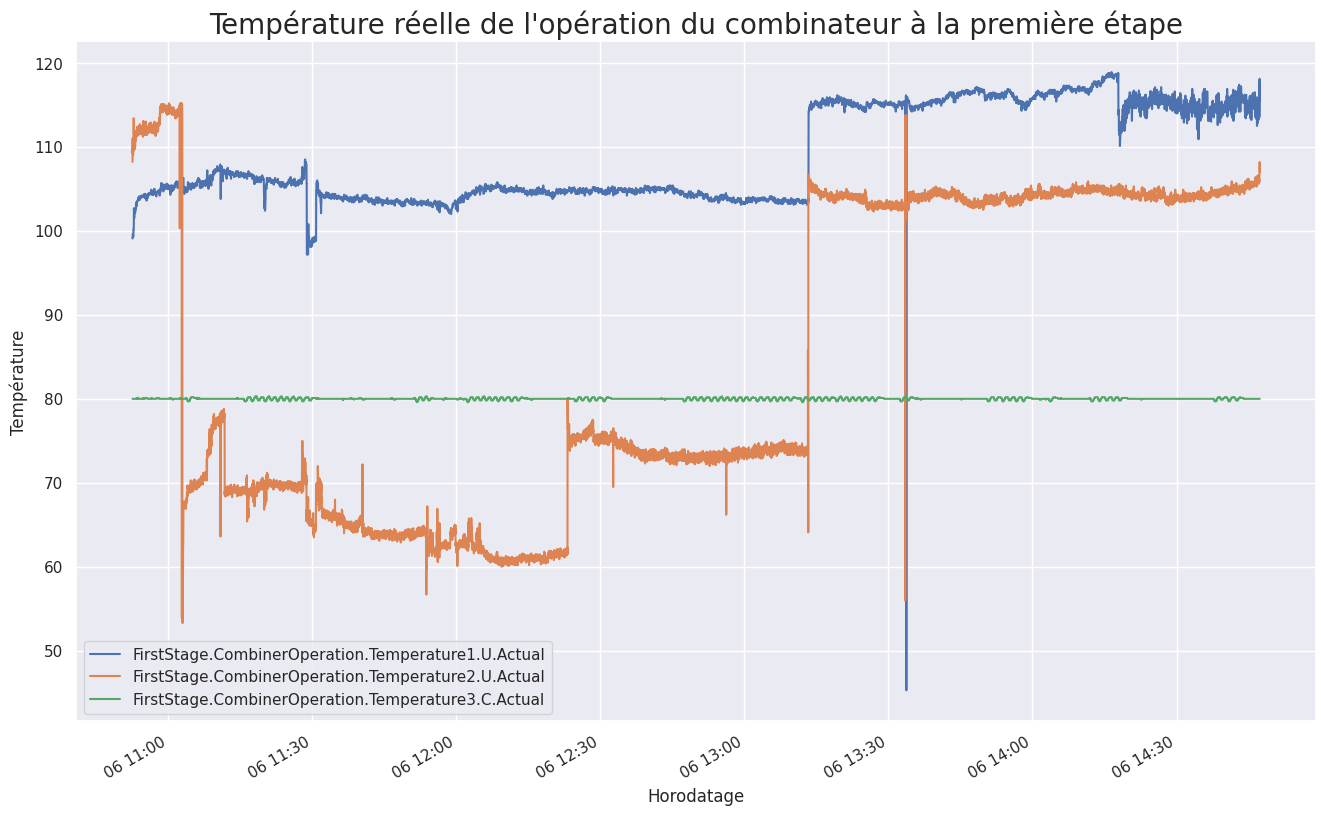

In [ ]:
# Conditions de fonctionnement à l'étape 1
colonnes_temp_fonctionnement_etape1 = ['FirstStage.CombinerOperation.Temperature1.U.Actual',
                              'FirstStage.CombinerOperation.Temperature2.U.Actual',
                              'FirstStage.CombinerOperation.Temperature3.C.Actual']

donnees_etape1.set_index("time_stamp")[colonnes_temp_fonctionnement_etape1].plot(figsize=(16, 10))
plt.xlabel("Horodatage")
plt.ylabel("Température")
plt.title("Température réelle de l'opération du combinateur à la première étape",
         fontsize=20)

Problèmes avec quelques valeurs abberantes

Nombre de points avant filtrage : 14088
Nombre de points après filtrage : 13947


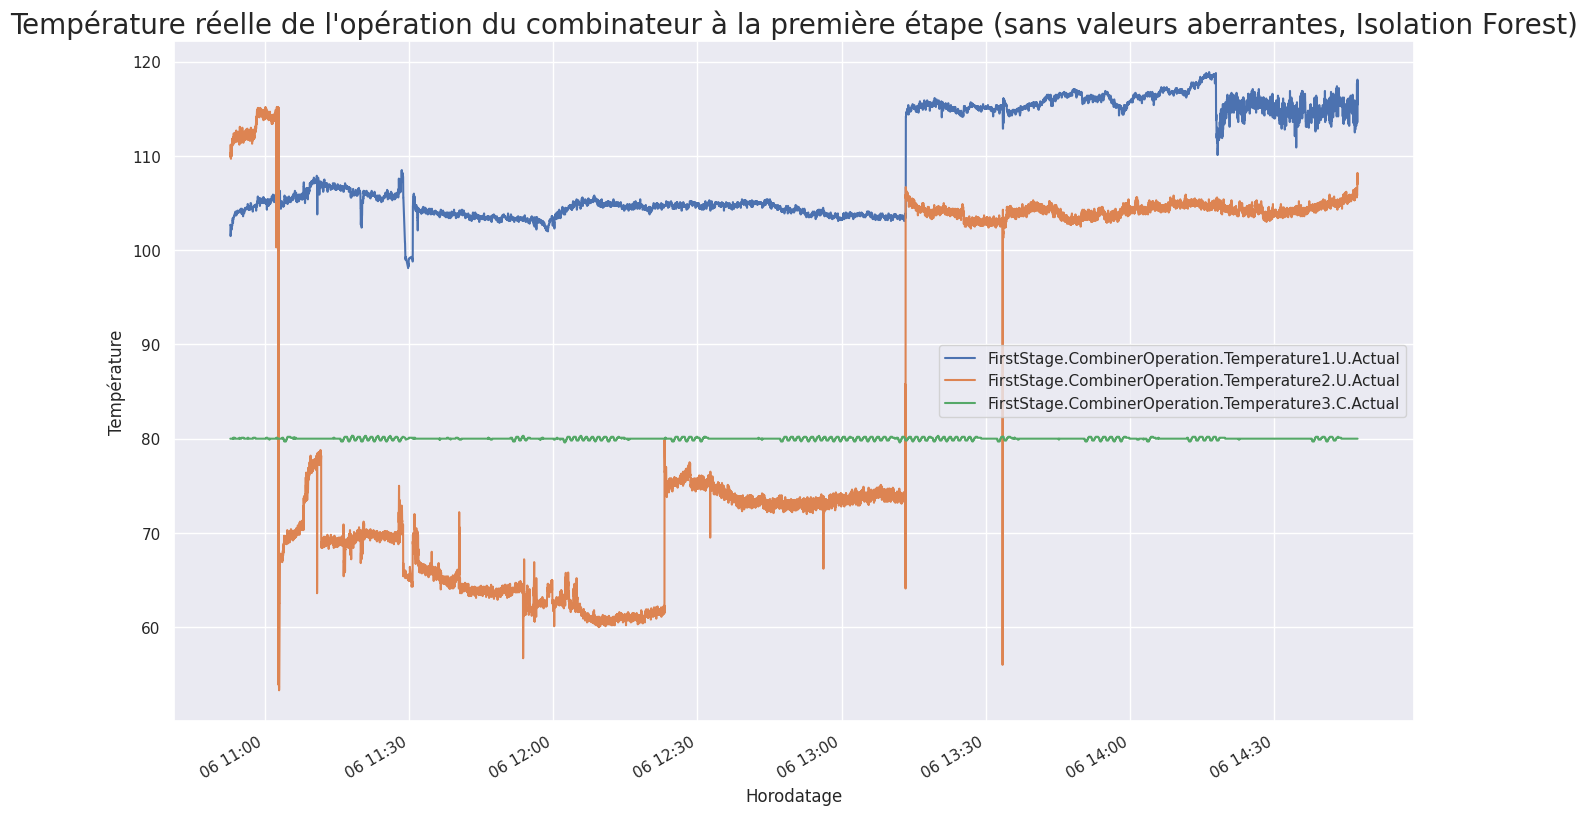

In [ ]:
from sklearn.ensemble import IsolationForest

# Isolation Forest pour la détection des valeurs aberrantes
def detect_outliers_isolation_forest(df, columns):
    isolation_forest = IsolationForest(contamination=0.01)  # ajustez le paramètre de contamination si nécessaire
    df['outlier'] = isolation_forest.fit_predict(df[columns])
    return df[df['outlier'] == 1].drop(columns=['outlier'])

# Appliquer la détection des valeurs aberrantes avec Isolation Forest
donnees_etape1_sans_aberrantes = detect_outliers_isolation_forest(donnees_etape1, colonnes_temp_fonctionnement_etape1)

# Vérification
print(f"Nombre de points avant filtrage : {len(donnees_etape1)}")
print(f"Nombre de points après filtrage : {len(donnees_etape1_sans_aberrantes)}")

donnees_etape1_sans_aberrantes.set_index("time_stamp")[colonnes_temp_fonctionnement_etape1].plot(figsize=(16, 10))
plt.xlabel("Horodatage")
plt.ylabel("Température")
plt.title("Température réelle de l'opération du combinateur à la première étape (sans valeurs aberrantes, Isolation Forest)", fontsize=20)
plt.show()


La température réelle de l'opération du combinateur était constante tandis que les températures du combinateur 1 et 2 ont augmenté vers la fin de la quatrième heure.

Comparons les matériaux entrant dans chaque machine à l'étape 1 dans un graphique linéaire (propriété en millimètres)

- **Propriété de matière première 1**

Text(0, 0.5, 'Propriété de matière première 1')

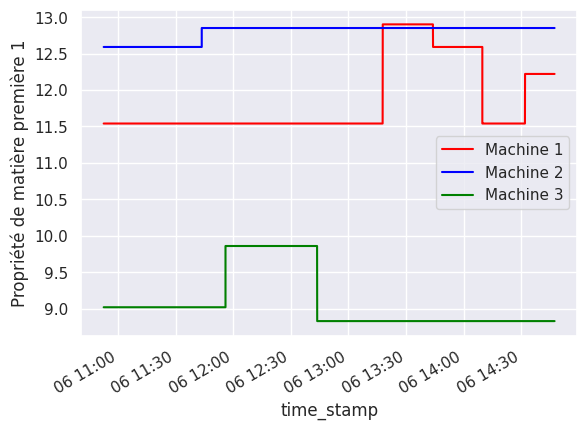

In [ ]:
machine_1_df.set_index("time_stamp", inplace=False)["RawMaterial.Property1"].plot(color="red", label="Machine 1")
machine_2_df.set_index("time_stamp", inplace=False)["RawMaterial.Property1"].plot(color="blue", label="Machine 2")
machine_3_df.set_index("time_stamp", inplace=False)["RawMaterial.Property1"].plot(color="green", label="Machine 3")
plt.legend()
plt.ylabel("Propriété de matière première 1")

La propriété de matière première 1 a été alimentée le plus dans la machine 2 et le moins dans la machine 3

- **Propriété de matière première 2**

Text(0, 0.5, 'Propriété de matière première 2')

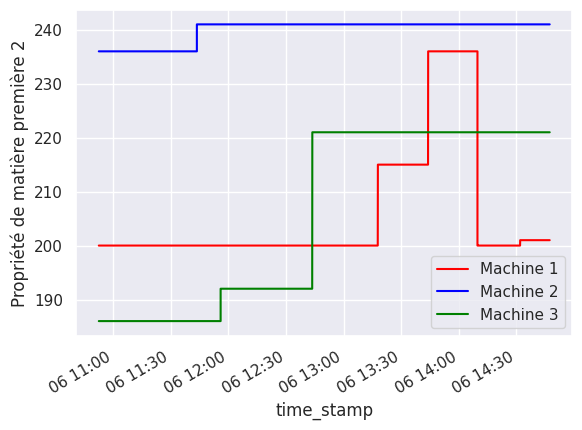

In [ ]:
machine_1_df.set_index("time_stamp", inplace=False)["RawMaterial.Property2"].plot(color="red", label="Machine 1")
machine_2_df.set_index("time_stamp", inplace=False)["RawMaterial.Property2"].plot(color="blue", label="Machine 2")
machine_3_df.set_index("time_stamp", inplace=False)["RawMaterial.Property2"].plot(color="green", label="Machine 3")
plt.legend()
plt.ylabel("Propriété de matière première 2")

La machine 2 a principalement reçu de la matière première 1 tandis que les machines 1 et 3 avaient un flux de matière première 2 constamment variable

- **Propriété de matière première 3**

Text(0, 0.5, 'Propriété de matière première 3')

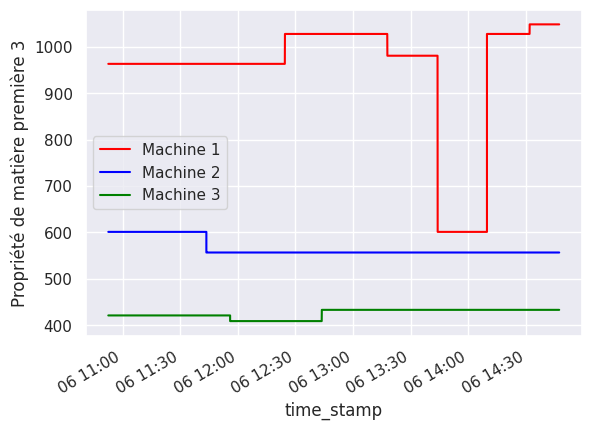

In [ ]:
machine_1_df.set_index("time_stamp", inplace=False)["RawMaterial.Property3"].plot(color="red", label="Machine 1")
machine_2_df.set_index("time_stamp", inplace=False)["RawMaterial.Property3"].plot(color="blue", label="Machine 2")
machine_3_df.set_index("time_stamp", inplace=False)["RawMaterial.Property3"].plot(color="green", label="Machine 3")
plt.legend()
plt.ylabel("Propriété de matière première 3")

La propriété de matière première 3 a été la plus alimentée dans la machine 1 et la moins dans la machine 3.

- **Propriété de matière première 4**

Text(0, 0.5, 'Propriété de matière première 4')

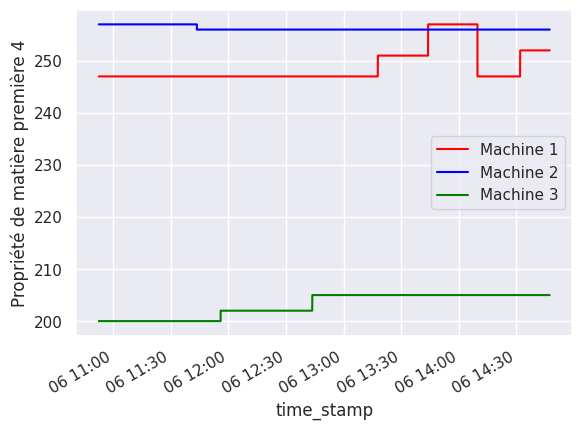

In [ ]:
machine_1_df.set_index("time_stamp", inplace=False)["RawMaterial.Property4"].plot(color="red", label="Machine 1")
machine_2_df.set_index("time_stamp", inplace=False)["RawMaterial.Property4"].plot(color="blue", label="Machine 2")
machine_3_df.set_index("time_stamp", inplace=False)["RawMaterial.Property4"].plot(color="green", label="Machine 3")
plt.legend()
plt.ylabel("Propriété de matière première 4")

Comme d'habitude, la machine 2 a reçu la matière première 4 tandis que la machine 3 a reçu le moins.

Calculons les températures moyennes de la zone de sortie pour chaque machine.

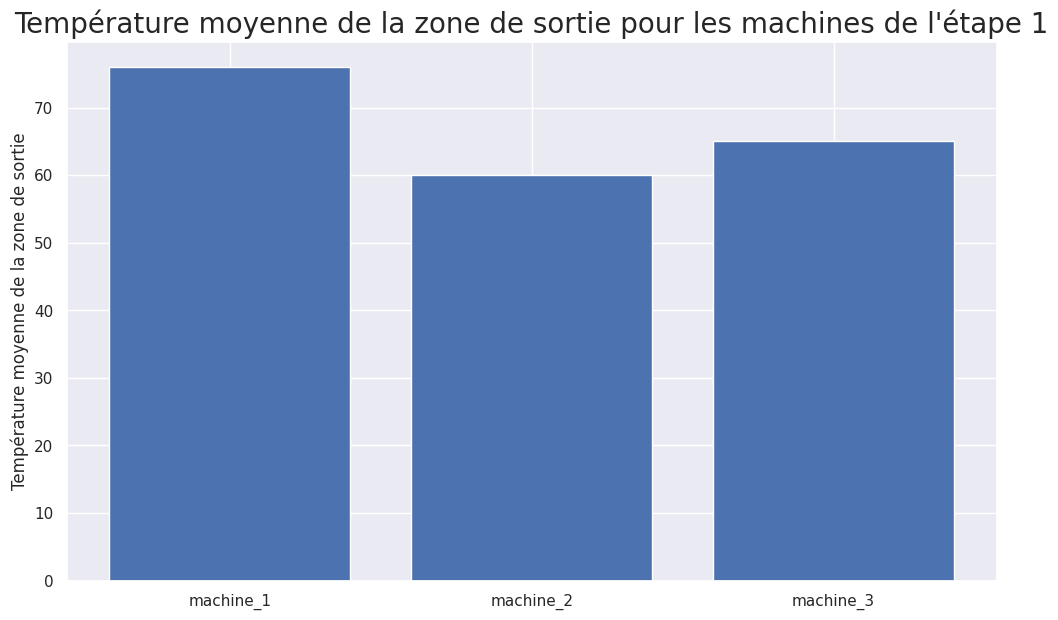

In [ ]:
liste_machines = [machine_1_df, machine_2_df, machine_3_df]

temperatures_moyennes_zone_sortie = [data_frame["ExitZoneTemperature.C.Actual"].mean() \
                                   for data_frame in liste_machines]
nom_liste_machines = ["machine_1", "machine_2", "machine_3"]

# création du graphique
plt.figure(figsize=(12, 7))
plt.bar(x=nom_liste_machines, height=temperatures_moyennes_zone_sortie)
plt.ylabel("Température moyenne de la zone de sortie")
plt.title("Température moyenne de la zone de sortie pour les machines de l'étape 1",
         fontsize=20)
plt.show()

La machine 1 avait la température de sortie la plus élevée parmi toutes les machines de l'étape 1, tandis que la machine 2 avait la plus basse.

<Axes: >

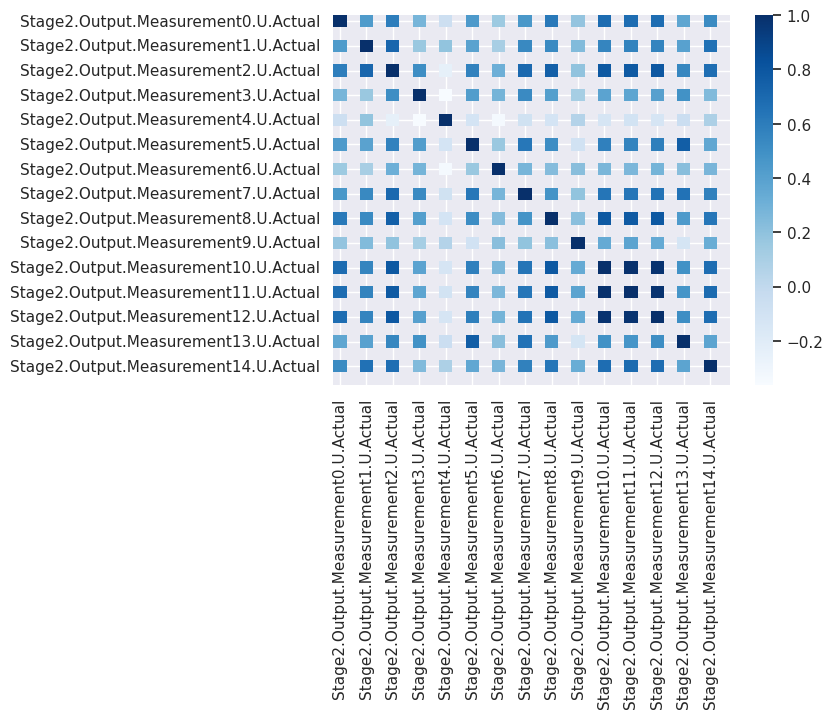

In [ ]:
# Corrélation des données de l'étape 2
sns.heatmap(donnees_etape2.set_index("time_stamp").corr(),
           cmap="Blues")

La mesure 12 avait une corrélation élevée avec les mesures 10 et 11. Un graphique linéaire sera tracé pour montrer comment les cinq dernières mesures réelles de l'étape 2 varient au fil du temps.

Text(0, 0.5, 'Mesures réelles')

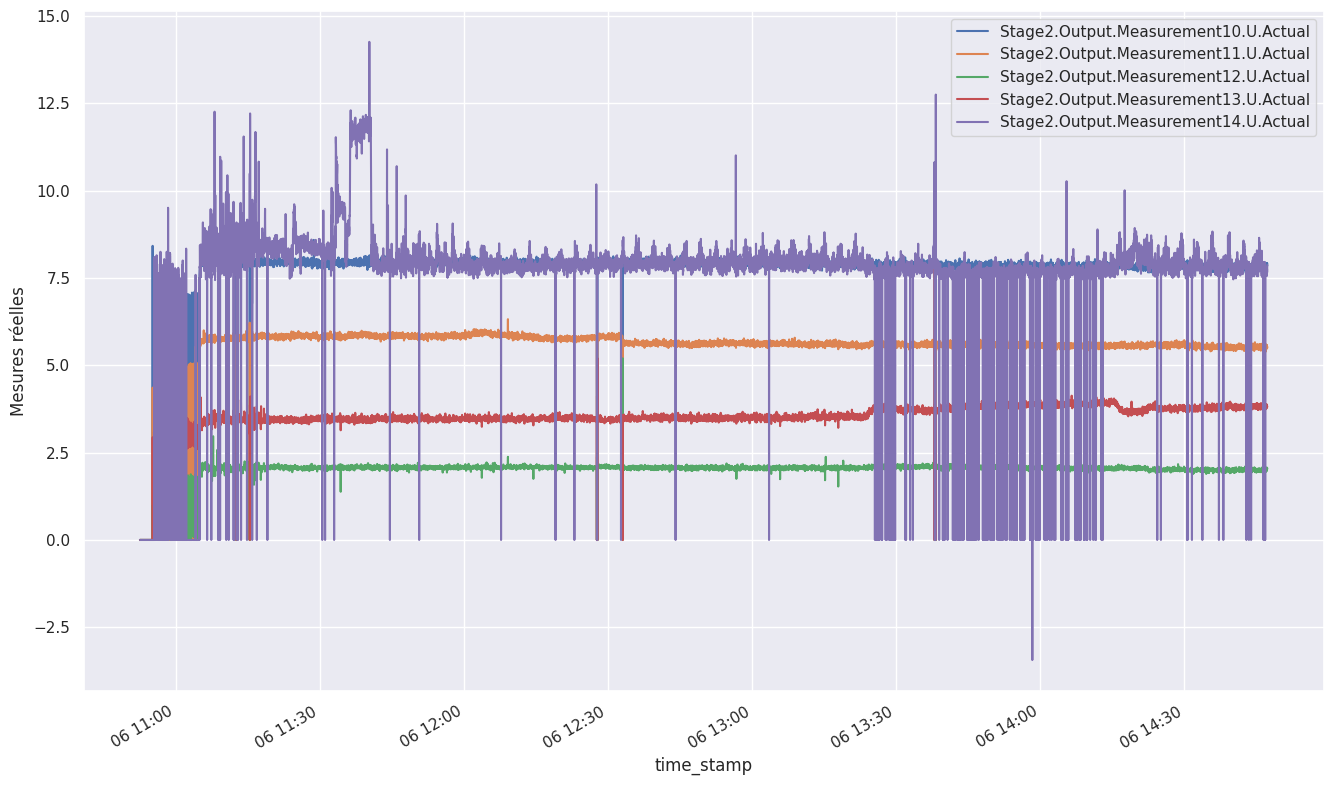

In [ ]:
dernieres_cinq_mesures_reelles = ['Stage2.Output.Measurement10.U.Actual',
                                 'Stage2.Output.Measurement11.U.Actual',
                                 'Stage2.Output.Measurement12.U.Actual',
                                 'Stage2.Output.Measurement13.U.Actual',
                                 'Stage2.Output.Measurement14.U.Actual']

# Tracer le graphique linéaire
df1[dernieres_cinq_mesures_reelles].plot(figsize=(16,10))
plt.ylabel("Mesures réelles")

Les mesures 10 à 13 avaient une tendance plate avec la mesure 10 ayant la lecture la plus élevée et la mesure 12 ayant la lecture réelle la plus basse tout le temps. La mesure 14 avait une lecture constamment fluctuante.

# Gestion des données

In [ ]:
df1.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,14088.00,14088.000000,1.408800e+04
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.535958e+00,7.930000e+00,5.416515e+00,5.650000e+00,1.972561e+00,1.850000e+00,3.535251e+00,2.89,7.515574,1.171000e+01
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.645785e+00,3.552840e-15,1.182333e+00,8.882099e-16,4.145398e-01,4.441050e-16,4.768244e-01,0.00,2.082948,1.776420e-15
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-5.220420e-95,7.930000e+00,-2.703210e-95,5.650000e+00,-6.200020e-96,1.850000e+00,-1.822810e-95,2.89,-3.437021,1.171000e+01
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.840000e+00,7.930000e+00,5.560000e+00,5.650000e+00,2.030000e+00,1.850000e+00,3.450000e+00,2.89,7.720000,1.171000e+01
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.900000e+00,7.930000e+00,5.630000e+00,5.650000e+00,2.060000e+00,1.850000e+00,3.510000e+00,2.89,7.870000,1.171000e+01
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.950000e+00,7.930000e+00,5.800000e+00,5.650000e+00,2.090000e+00,1.850000e+00,3.760000e+00,2.89,8.080000,1.171000e+01
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.590000e+00,7.930000e+00,6.320000e+00,5.650000e+00,5.200000e+00,1.850000e+00,8.000000e+00,2.89,14.260000,1.171000e+01


Trouver les valeurs aberrantes dans `Stage1.Output.Measurement14.U.Actual` à l'étape 1, qui est le point final de mesure de l'étape 1.

<Axes: ylabel='Stage1.Output.Measurement14.U.Actual'>

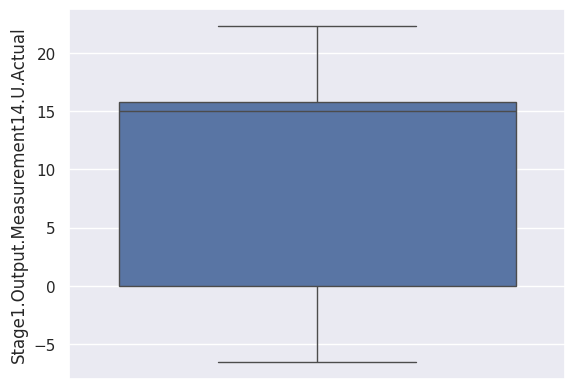

In [ ]:
sns.boxplot(donnees_etape1["Stage1.Output.Measurement14.U.Actual"])

La ligne médiane semble être en haut du box plot, un histogramme tracera la distribution des dernières mesures non contrôlées à l'étape 1.

(array([2.000e+00, 4.000e+00, 5.013e+03, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 8.873e+03, 1.860e+02, 6.000e+00]),
 array([-6.54892438, -3.66385317, -0.77878196,  2.10628925,  4.99136047,
         7.87643168, 10.76150289, 13.6465741 , 16.53164532, 19.41671653,
        22.30178774]),
 <BarContainer object of 10 artists>)

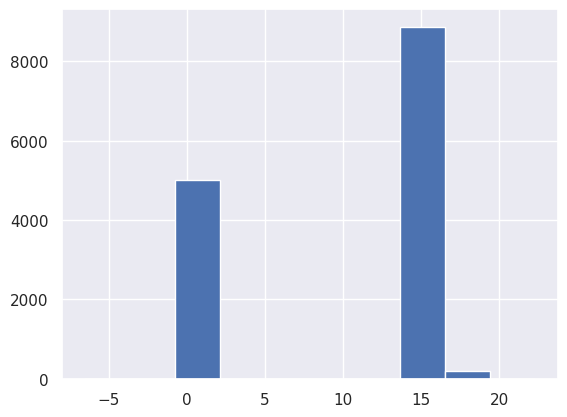

In [ ]:
plt.hist(donnees_etape1["Stage1.Output.Measurement14.U.Actual"])

Il y a une distribution indéfinie où parfois il n'y avait pas de mesures tandis qu'à d'autres moments les mesures augmentaient. Cela sera inspecté plus avant à l'aide d'un graphique linéaire pour savoir quand les mesures ont lu zéro.

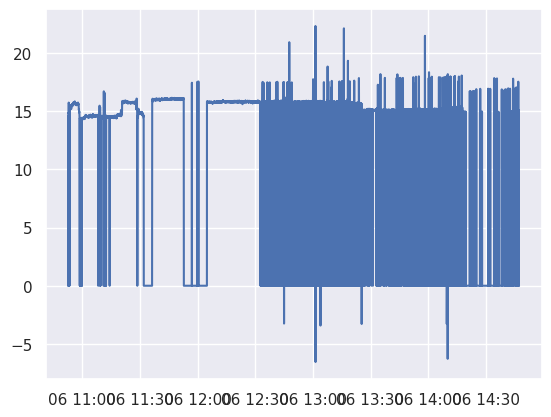

In [ ]:
plt.plot(donnees_etape1.set_index("time_stamp")["Stage1.Output.Measurement14.U.Actual"])

Les mesures finales à l'étape 1 n'avaient pas de tendance claire sauf qu'il y avait des fluctuations très fréquentes qui peuvent être affectées par des conditions extérieures, car les mesures ont été prises sous une variable non contrôlée.

Lissons la mesure en trouvant une moyenne mobile et traçons-la à nouveau.

Text(0.5, 1.0, 'Mesure réelle 14 sur 4 heures')

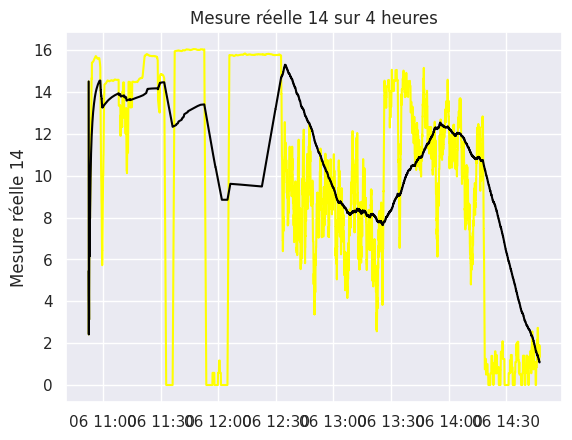

In [ ]:
# calculer la moyenne mobile sur 1 et 30 minutes
moyenne_mobile_1_minute = donnees_etape1.set_index("time_stamp").rolling('60s').mean()
moyenne_mobile_30_minutes = donnees_etape1.set_index("time_stamp").rolling('1800s').mean()

# tracer les données
plt.plot(moyenne_mobile_1_minute["Stage1.Output.Measurement14.U.Actual"], color="yellow",
         label="moyenne mobile de 1 minute")
plt.plot(moyenne_mobile_30_minutes["Stage1.Output.Measurement14.U.Actual"], color="black",
         label="moyenne mobile de 30 minutes")

plt.ylabel("Mesure réelle 14")
plt.title("Mesure réelle 14 sur 4 heures")

La mesure était basse lorsque la machine à l'étape 1 recevait des entrées et a soudainement augmenté une fois que les sorties ont atteint l'emplacement 14 de mesure (dernier emplacement). Elle a ensuite chuté de manière significative lorsque le processus s'est terminé.

# Conclusion

Les données de ce projet ont été collectées auprès de 5 machines différentes sur une période d'environ 4 heures. 3 machines étaient connectées en parallèle à la première étape tandis que la deuxième étape avait des machines connectées en série. Les mesures ont été prises à différents emplacements.

Les données ont ensuite été chargées dans un DataFrame pandas et inspectées. Il a été constaté que l'humidité de l'environnement avait un impact sur la température de sorte que des humidités très élevées et très basses augmentaient les températures environnantes. La machine 2 a reçu le plus de matières premières tandis que la machine 3 en a reçu le moins. Cependant, la même machine 2 avait la température de sortie la plus basse de toutes les machines de l'étape 1. La plupart des mesures avaient des lectures fluctuantes sauf pour les mesures 10 à 13 à la deuxième étape.

Splitting data into train and test data

In [ ]:
list(df.columns)


['time_stamp',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.RawMaterial.Property1',
 'Machine1.RawMaterial.Property2',
 'Machine1.RawMaterial.Property3',
 'Machine1.RawMaterial.Property4',
 'Machine1.RawMaterialFeederParameter.U.Actual',
 'Machine1.Zone1Temperature.C.Actual',
 'Machine1.Zone2Temperature.C.Actual',
 'Machine1.MotorAmperage.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine1.MaterialPressure.U.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'Machine1.ExitZoneTemperature.C.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property2',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterialFeederParameter.U.Actual',
 'Machine2.Zone1Temperature.C.Actual',
 'Machine2.Zone2Temperature.C.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine2.MotorRPM.C.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine2.ExitZ

# Machine Learning

In [ ]:
stage1_columns = [col for col in df.columns if col.startswith('Stage1')]
stage2_columns = [col for col in df.columns if col.startswith('Stage2')]

# Création des dataframes séparés pour Stage1 et Stage2
df_stage1 = df[stage1_columns]
df_stage2 = df[stage2_columns]

# Affichage des colonnes sélectionnées pour vérification
print("Colonnes de Stage1:", df_stage1.columns)
print("Colonnes de Stage2:", df_stage2.columns)

Colonnes de Stage1: Index(['Stage1.Output.Measurement0.U.Actual',
       'Stage1.Output.Measurement0.U.Setpoint',
       'Stage1.Output.Measurement1.U.Actual',
       'Stage1.Output.Measurement1.U.Setpoint',
       'Stage1.Output.Measurement2.U.Actual',
       'Stage1.Output.Measurement2.U.Setpoint',
       'Stage1.Output.Measurement3.U.Actual',
       'Stage1.Output.Measurement3.U.Setpoint',
       'Stage1.Output.Measurement4.U.Actual',
       'Stage1.Output.Measurement4.U.Setpoint',
       'Stage1.Output.Measurement5.U.Actual',
       'Stage1.Output.Measurement5.U.Setpoint',
       'Stage1.Output.Measurement6.U.Actual',
       'Stage1.Output.Measurement6.U.Setpoint',
       'Stage1.Output.Measurement7.U.Actual',
       'Stage1.Output.Measurement7.U.Setpoint',
       'Stage1.Output.Measurement8.U.Actual',
       'Stage1.Output.Measurement8.U.Setpoint',
       'Stage1.Output.Measurement9.U.Actual',
       'Stage1.Output.Measurement9.U.Setpoint',
       'Stage1.Output.Measurement10.U.Ac

In [ ]:
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Séparation des features (X) et des targets (y) pour Stage1 et Stage2

# Suppression des colonnes non numériques
df_numeric = df.select_dtypes(include=[np.number])

# Définition des features (X) et des targets (y)
features = df_numeric.drop(columns=stage1_columns + stage2_columns)
X = features.values
y_stage1 = df[stage1_columns].values
y_stage2 = df[stage2_columns].values

# Split des données en training et test sets pour Stage1 et Stage2
X_train, X_test, y_stage1_train, y_stage1_test = train_test_split(X, y_stage1, test_size=0.2, random_state=42)
X_train, X_test, y_stage2_train, y_stage2_test = train_test_split(X, y_stage2, test_size=0.2, random_state=42)

# Création des modèles
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Decision Tree': MultiOutputRegressor(DecisionTreeRegressor(random_state=42)),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(random_state=42))
}

# Entraînement et évaluation des modèles pour Stage1
print("Stage1 Predictions")
for name, model in models.items():
    model.fit(X_train, y_stage1_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_stage1_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")

# Entraînement et évaluation des modèles pour Stage2
print("\nStage2 Predictions")
for name, model in models.items():
    model.fit(X_train, y_stage2_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_stage2_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")


Stage1 Predictions
Linear Regression - Mean Squared Error: 3.434970917044286
Decision Tree - Mean Squared Error: 3.0441360587504525


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Sélection des colonnes pour Stage1 et Stage2
stage1_columns = [col for col in df.columns if col.startswith('Stage1')]
stage2_columns = [col for col in df.columns if col.startswith('Stage2')]

# Séparation des features (X) et des targets (y) pour Stage1 et Stage2
features = df.drop(columns=stage1_columns + stage2_columns)
features = features.select_dtypes(exclude=['datetime64'])  # Exclure les colonnes de type Timestamp
X = features.values
y_stage1 = df[stage1_columns].values
y_stage2 = df[stage2_columns].values

# Normalisation des features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split des données en training et test sets pour Stage1 et Stage2
X_train, X_test, y_stage1_train, y_stage1_test = train_test_split(X, y_stage1, test_size=0.2, random_state=42)
X_train, X_test, y_stage2_train, y_stage2_test = train_test_split(X, y_stage2, test_size=0.2, random_state=42)

# Création et entraînement du modèle MLPRegressor pour Stage1
model_stage1 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
model_stage1.fit(X_train, y_stage1_train)

# Prédictions pour Stage1
y_stage1_pred = model_stage1.predict(X_test)

# Calcul de la MSE pour Stage1
mse_stage1 = mean_squared_error(y_stage1_test, y_stage1_pred)
print("MSE Stage1:", mse_stage1)

# Création et entraînement du modèle MLPRegressor pour Stage2
model_stage2 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
model_stage2.fit(X_train, y_stage2_train)

# Prédictions pour Stage2
y_stage2_pred = model_stage2.predict(X_test)

# Calcul de la MSE pour Stage2
mse_stage2 = mean_squared_error(y_stage2_test, y_stage2_pred)
print("MSE Stage2:", mse_stage2)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Convertir les colonnes `Timestamp` en caractéristiques numériques
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df['year'] = df['time_stamp'].dt.year
df['month'] = df['time_stamp'].dt.month
df['day'] = df['time_stamp'].dt.day
df['hour'] = df['time_stamp'].dt.hour
df['minute'] = df['time_stamp'].dt.minute
df['second'] = df['time_stamp'].dt.second

# Supprimer la colonne 'time_stamp' maintenant qu'elle a été convertie en colonnes numériques
df = df.drop(columns=['time_stamp'])

# Sélection des colonnes pour Stage1 et Stage2
stage1_columns = [col for col in df.columns if col.startswith('Stage1')]
stage2_columns = [col for col in df.columns if col.startswith('Stage2')]

# Séparation des features (X) et des targets (y) pour Stage1 et Stage2
features = df.drop(columns=stage1_columns + stage2_columns)
features = features.select_dtypes(exclude=['datetime64'])  # Exclure les colonnes de type Timestamp
X = features.values
y_stage1 = df[stage1_columns].values
y_stage2 = df[stage2_columns].values

# Normalisation des features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split des données en training et test sets pour Stage1 et Stage2
X_train, X_test, y_stage1_train, y_stage1_test = train_test_split(X, y_stage1, test_size=0.2, random_state=42)
X_train, X_test, y_stage2_train, y_stage2_test = train_test_split(X, y_stage2, test_size=0.2, random_state=42)

# Création du modèle MIMO avec Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_stage1_train.shape[1]),
    Dense(y_stage2_train.shape[1])
])

model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
model.fit(X_train, [y_stage1_train, y_stage2_train], epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
282/282 [==============================] - 4s 4ms/step - loss: 36.9389 - val_loss: 5.4896
Epoch 2/50
282/282 [==============================] - 1s 3ms/step - loss: 4.8351 - val_loss: 4.6246
Epoch 3/50
282/282 [==============================] - 1s 3ms/step - loss: 4.2570 - val_loss: 4.2564
Epoch 4/50
282/282 [==============================] - 1s 3ms/step - loss: 3.9345 - val_loss: 3.9741
Epoch 5/50
282/282 [==============================] - 1s 3ms/step - loss: 3.6465 - val_loss: 3.6764
Epoch 6/50
282/282 [==============================] - 1s 3ms/step - loss: 3.3365 - val_loss: 3.4065
Epoch 7/50
282/282 [==============================] - 1s 3ms/step - loss: 3.0920 - val_loss: 3.3067
Epoch 8/50
282/282 [==============================] - 1s 4ms/step - loss: 2.9444 - val_loss: 3.0928
Epoch 9/50
282/282 [==============================] - 1s 5ms/step - loss: 2.8038 - val_loss: 3.0383
Epoch 10/50
282/282 [==============================] - 1s 5ms/step - loss: 2.7168 - val_loss: 2.936

Processus d'entraînement du modèle sur plusieurs époques (epochs) lors de l'utilisation de l'algorithme d'optimisation Adam pour minimiser la perte (loss), qui est mesurée par la fonction d'erreur quadratique moyenne (MSE).

In [ ]:
from matplotlib import pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
